In [1]:
## Notebook env: farnaz_spatial (farnaz_spatial kernel)
## this notebook quantifies and compares the frequency of each cell type across different regions and temperatures

In [1]:
import sys
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:
## load in the data

results_folder = '/home/ssobti/projects/farnaz_spatial/output_data/cell2location/multi_ref_annot'

# create paths and names to results folders for reference regression and cell2location models
ref_run_name = f'{results_folder}/reference_signatures'
run_name = f'{results_folder}/cell2location_map/N2_alpha20'

adata_file = f"{run_name}/sp.h5ad"
adata_vis = sc.read_h5ad(adata_file)

In [3]:
adata_vis.obs

in_tissue  array_row  array_col    sample  \
spot_id                                                                  
count-A1_AAACAAGTATCTCCCA-1          1         50        102  count-A1   
count-A1_AAACACCAATAACTGC-1          1         59         19  count-A1   
count-A1_AAACAGCTTTCAGAAG-1          1         43          9  count-A1   
count-A1_AAACAGGGTCTATATT-1          1         47         13  count-A1   
count-A1_AAACAGTGTTCCTGGG-1          1         73         43  count-A1   
...                                ...        ...        ...       ...   
count-D1_TTGTTAGCAAATTCGA-1          1         22         42  count-D1   
count-D1_TTGTTCAGTGTGCTAC-1          1         24         64  count-D1   
count-D1_TTGTTTCACATCCAGG-1          1         58         42  count-D1   
count-D1_TTGTTTCCATACAACT-1          1         45         27  count-D1   
count-D1_TTGTTTGTGTAAATTC-1          1          7         51  count-D1   

                             n_genes_by_counts  log1p_n_genes_by_counts  \
spot_id                                                                   
count-A1_AAACAAGTATCTCCCA-1               3976                 8.288283   
count-A1_AAACACCAATAACTGC-1               4429                 8.396155   
count-A1_AAACAGCTTTCAGAAG-1               1826                 7.510431   
count-A1_AAACAGGGTCTATATT-1               2560                 7.848153   
count-A1_AAACAGTGTTCCTGGG-1               4224                 8.348775   
...                                        ...                      ...   
count-D1_TTGTTAGCAAATTCGA-1               3821                 8.248529   
count-D1_TTGTTCAGTGTGCTAC-1               2552                 7.845024   
count-D1_TTGTTTCACATCCAGG-1                730                 6.594413   
count-D1_TTGTTTCCATACAACT-1               1768                 7.478170   
count-D1_TTGTTTGTGTAAATTC-1               3685                 8.212297   

                             total_counts  log1p_total_counts  \
spot_id                                                         
count-A1_AAACAAGTATCTCCCA-1       10597.0            9.268420   
count-A1_AAACACCAATAACTGC-1       14374.0            9.573246   
count-A1_AAACAGCTTTCAGAAG-1        3311.0            8.105308   
count-A1_AAACAGGGTCTATATT-1        5105.0            8.538172   
count-A1_AAACAGTGTTCCTGGG-1       13278.0            9.493939   
...                                   ...                 ...   
count-D1_TTGTTAGCAAATTCGA-1        8888.0            9.092570   
count-D1_TTGTTCAGTGTGCTAC-1        4844.0            8.485703   
count-D1_TTGTTTCACATCCAGG-1         970.0            6.878326   
count-D1_TTGTTTCCATACAACT-1        3037.0            8.018954   
count-D1_TTGTTTGTGTAAATTC-1        8191.0            9.010913   

                             pct_counts_in_top_50_genes  \
spot_id                                                   
count-A1_AAACAAGTATCTCCCA-1                   22.421440   
count-A1_AAACACCAATAACTGC-1                   24.356477   
count-A1_AAACAGCTTTCAGAAG-1                   23.165207   
count-A1_AAACAGGGTCTATATT-1                   22.683643   
count-A1_AAACAGTGTTCCTGGG-1                   28.212080   
...                                                 ...   
count-D1_TTGTTAGCAAATTCGA-1                   19.723222   
count-D1_TTGTTCAGTGTGCTAC-1                   21.717589   
count-D1_TTGTTTCACATCCAGG-1                   24.948454   
count-D1_TTGTTTCCATACAACT-1                   24.135660   
count-D1_TTGTTTGTGTAAATTC-1                   23.049689   

                             pct_counts_in_top_100_genes  \
spot_id                                                    
count-A1_AAACAAGTATCTCCCA-1                    29.470605   
count-A1_AAACACCAATAACTGC-1                    31.904828   
count-A1_AAACAGCTTTCAGAAG-1                    30.927212   
count-A1_AAACAGGGTCTATATT-1                    29.676787   
count-A1_AAACAGTGTTCCTGGG-1                    34.907366   
...                                                  ...

In [4]:
adata_vis.obsm['q05_cell_abundance_w_sf']

q05cell_abundance_w_sf_Adipocyte_progenitors  \
spot_id                                                                     
count-A1_AAACAAGTATCTCCCA-1                                      0.262522   
count-A1_AAACACCAATAACTGC-1                                      0.006819   
count-A1_AAACAGCTTTCAGAAG-1                                      0.013219   
count-A1_AAACAGGGTCTATATT-1                                      0.018923   
count-A1_AAACAGTGTTCCTGGG-1                                      0.006787   
...                                                                   ...   
count-D1_TTGTTAGCAAATTCGA-1                                      0.019799   
count-D1_TTGTTCAGTGTGCTAC-1                                      0.040310   
count-D1_TTGTTTCACATCCAGG-1                                      0.016693   
count-D1_TTGTTTCCATACAACT-1                                      0.015628   
count-D1_TTGTTTGTGTAAATTC-1                                      0.016167   

                             q05cell_abundance_w_sf_Adipocytes  \
spot_id                                                          
count-A1_AAACAAGTATCTCCCA-1                           0.042641   
count-A1_AAACACCAATAACTGC-1                           0.078485   
count-A1_AAACAGCTTTCAGAAG-1                           0.049115   
count-A1_AAACAGGGTCTATATT-1                           0.072705   
count-A1_AAACAGTGTTCCTGGG-1                           0.104081   
...                                                        ...   
count-D1_TTGTTAGCAAATTCGA-1                           0.067285   
count-D1_TTGTTCAGTGTGCTAC-1                           0.084798   
count-D1_TTGTTTCACATCCAGG-1                           0.021247   
count-D1_TTGTTTCCATACAACT-1                           0.058105   
count-D1_TTGTTTGTGTAAATTC-1                           0.104233   

                             q05cell_abundance_w_sf_B_cells  \
spot_id                                                       
count-A1_AAACAAGTATCTCCCA-1                        0.010508   
count-A1_AAACACCAATAACTGC-1                        0.005305   
count-A1_AAACAGCTTTCAGAAG-1                        0.007240   
count-A1_AAACAGGGTCTATATT-1                        0.014113   
count-A1_AAACAGTGTTCCTGGG-1                        0.009095   
...                                                     ...   
count-D1_TTGTTAGCAAATTCGA-1                        0.099345   
count-D1_TTGTTCAGTGTGCTAC-1                        0.044624   
count-D1_TTGTTTCACATCCAGG-1                        0.006483   
count-D1_TTGTTTCCATACAACT-1                        0.014285   
count-D1_TTGTTTGTGTAAATTC-1                        0.053949   

                             q05cell_abundance_w_sf_Brown_adipocytes  \
spot_id                                                                
count-A1_AAACAAGTATCTCCCA-1                                 0.251349   
count-A1_AAACACCAATAACTGC-1                                 0.300542   
count-A1_AAACAGCTTTCAGAAG-1                                 0.197072   
count-A1_AAACAGGGTCTATATT-1                                 0.243224   
count-A1_AAACAGTGTTCCTGGG-1                                 0.274012   
...                                                              ...   
count-D1_TTGTTAGCAAATTCGA-1                                 0.205847   
count-D1_TTGTTCAGTGTGCTAC-1                                 0.168679   
count-D1_TTGTTTCACATCCAGG-1                                 0.066701   
count-D1_TTGTTTCCATACAACT-1                                 0.119901   
count-D1_TTGTTTGTGTAAATTC-1                                 0.138062   

                             q05cell_abundance_w_sf_Endothelial_cells  \
spot_id                                                                 
count-A1_AAACAAGTATCTCCCA-1                                  0.107226   
count-A1_AAACACCAATAACTGC-1                                  0.093771   
count-A1_AAACAGCTTTCAGAAG-1                                  0.112293   
count-A1_AAACAGGGTCTATATT-1                   

In [5]:
### comparing cell type frequencies across slides using celltype thresholds
## for each cell type in a given slide, find the mean of the 95% quantile of spots in each slide, and set the threshold to be 50% of that mean
## count percent of cells that are above the threshold in each slide and compare across slides

In [6]:
deconvoluted_data = adata_vis.obsm['q05_cell_abundance_w_sf']
maxes = deconvoluted_data.quantile(0.99, axis = 0)
maxes3 = deconvoluted_data.quantile(0.95, axis = 0)
upper_cut_cell_types = ['Brown_adipocytes', 'white adipocytes', 'Neutrophils', 'Pericytes', 'Skeletal_muscle', 'T_cells', 'Tregs', 'Vascular_smooth_muscle', 'NK_cells', 'Mast_cells', 'Mesothelium', 'Macrophages', 'B_cells']
final_maxes = [maxes[index] if name in upper_cut_cell_types else maxes3[index] for index, name in enumerate(deconvoluted_data.columns.str.replace('q05cell_abundance_w_sf_', ''))]
deconvoluted_data['sample'] = adata_vis.obs['sample']

normalized_deconvoluted_dict = {}
deconvoluted_counts = {}
deconvoluted_proportions = {}

maxes2 = [1, 0.145, 0.35, 0.45,
         0.4, 0.11, 0.0675, 0.1475,
          0.46, 0.04, 0.0725, 0.215,
          0.235, 0.49, 0.66, 0.325,
          0.31, 0.275, 0.225, 0.095]

for slide in deconvoluted_data['sample'].unique():
    normalized_deconvoluted_dict[slide] = deconvoluted_data.loc[deconvoluted_data['sample'] == slide, :].drop(columns = ['sample'])
    normalized_deconvoluted_dict[slide] = normalized_deconvoluted_dict[slide]/final_maxes ## normalized_deconvoluted_dict[slide].quantile(0.95) ## could divide by maxes2 instead
    deconvoluted_counts[slide] = normalized_deconvoluted_dict[slide] > 0.75
    deconvoluted_counts[slide] = deconvoluted_counts[slide].astype(int)
    deconvoluted_proportions[slide] = deconvoluted_counts[slide].sum(axis = 0)/deconvoluted_counts[slide].count(axis = 0)

combined_deconvoluted_counts = pd.concat(deconvoluted_counts.values(), axis = 0)
combined_deconvoluted_counts.reindex(adata_vis.obs.index)


q05cell_abundance_w_sf_Adipocyte_progenitors  \
spot_id                                                                     
count-A1_AAACAAGTATCTCCCA-1                                             0   
count-A1_AAACACCAATAACTGC-1                                             0   
count-A1_AAACAGCTTTCAGAAG-1                                             0   
count-A1_AAACAGGGTCTATATT-1                                             0   
count-A1_AAACAGTGTTCCTGGG-1                                             0   
...                                                                   ...   
count-D1_TTGTTAGCAAATTCGA-1                                             0   
count-D1_TTGTTCAGTGTGCTAC-1                                             0   
count-D1_TTGTTTCACATCCAGG-1                                             0   
count-D1_TTGTTTCCATACAACT-1                                             0   
count-D1_TTGTTTGTGTAAATTC-1                                             0   

                             q05cell_abundance_w_sf_Adipocytes  \
spot_id                                                          
count-A1_AAACAAGTATCTCCCA-1                                  0   
count-A1_AAACACCAATAACTGC-1                                  0   
count-A1_AAACAGCTTTCAGAAG-1                                  0   
count-A1_AAACAGGGTCTATATT-1                                  0   
count-A1_AAACAGTGTTCCTGGG-1                                  1   
...                                                        ...   
count-D1_TTGTTAGCAAATTCGA-1                                  0   
count-D1_TTGTTCAGTGTGCTAC-1                                  0   
count-D1_TTGTTTCACATCCAGG-1                                  0   
count-D1_TTGTTTCCATACAACT-1                                  0   
count-D1_TTGTTTGTGTAAATTC-1                                  1   

                             q05cell_abundance_w_sf_B_cells  \
spot_id                                                       
count-A1_AAACAAGTATCTCCCA-1                               0   
count-A1_AAACACCAATAACTGC-1                               0   
count-A1_AAACAGCTTTCAGAAG-1                               0   
count-A1_AAACAGGGTCTATATT-1                               0   
count-A1_AAACAGTGTTCCTGGG-1                               0   
...                                                     ...   
count-D1_TTGTTAGCAAATTCGA-1                               0   
count-D1_TTGTTCAGTGTGCTAC-1                               0   
count-D1_TTGTTTCACATCCAGG-1                               0   
count-D1_TTGTTTCCATACAACT-1                               0   
count-D1_TTGTTTGTGTAAATTC-1                               0   

                             q05cell_abundance_w_sf_Brown_adipocytes  \
spot_id                                                                
count-A1_AAACAAGTATCTCCCA-1                                        0   
count-A1_AAACACCAATAACTGC-1                                        0   
count-A1_AAACAGCTTTCAGAAG-1                                        0   
count-A1_AAACAGGGTCTATATT-1                                        0   
count-A1_AAACAGTGTTCCTGGG-1                                        0   
...                                                              ...   
count-D1_TTGTTAGCAAATTCGA-1                                        0   
count-D1_TTGTTCAGTGTGCTAC-1                                        0   
count-D1_TTGTTTCACATCCAGG-1                                        0   
count-D1_TTGTTTCCATACAACT-1                                        0   
count-D1_TTGTTTGTGTAAATTC-1                                        0   

                             q05cell_abundance_w_sf_Endothelial_cells  \
spot_id                                                                 
count-A1_AAACAAGTATCTCCCA-1                                         0   
count-A1_AAACACCAATAACTGC-1                                         0   
count-A1_AAACAGCTTTCAGAAG-1                                         0   
count-A1_AAACAGGGTCTATATT-1                   

In [7]:
thresholds_df = pd.DataFrame(zip(deconvoluted_data.columns.str.replace('q05cell_abundance_w_sf_', ''), 
                                   np.array(final_maxes) * 0.75), index = None, columns = ['cell_type', 'threshold'])

#thresholds_df.to_csv('~/projects/farnaz_spatial/notebooks/post_cell2loc_analysis/thresholds.csv')
thresholds_df

cell_type  threshold
0         Adipocyte_progenitors   0.307305
1                    Adipocytes   0.103200
2                       B_cells   0.268408
3              Brown_adipocytes   0.381211
4             Endothelial_cells   0.210508
5                   Eosinophils   0.038736
6              Epithelial_cells   0.028756
7   Lymphatic_endothelial_cells   0.063130
8                   Macrophages   0.312653
9                    Mast_cells   0.019689
10                  Mesothelium   0.050832
11                     NK_cells   0.123848
12                  Neutrophils   0.165766
13                    Pericytes   0.340325
14                 Schwan_cells   0.209719
15              Skeletal_muscle   0.339640
16                      T_cells   0.189234
17                        Tregs   0.156982
18       Vascular_smooth_muscle   0.151637
19             white adipocytes   0.058648

In [8]:
slide = 'count-A1'
deconvoluted_data.loc[deconvoluted_data['sample'] == slide, :].drop(columns = ['sample'])

q05cell_abundance_w_sf_Adipocyte_progenitors  \
spot_id                                                                     
count-A1_AAACAAGTATCTCCCA-1                                      0.262522   
count-A1_AAACACCAATAACTGC-1                                      0.006819   
count-A1_AAACAGCTTTCAGAAG-1                                      0.013219   
count-A1_AAACAGGGTCTATATT-1                                      0.018923   
count-A1_AAACAGTGTTCCTGGG-1                                      0.006787   
...                                                                   ...   
count-A1_TTGTTTCACATCCAGG-1                                      0.016799   
count-A1_TTGTTTCATTAGTCTA-1                                      0.019275   
count-A1_TTGTTTCCATACAACT-1                                      0.005159   
count-A1_TTGTTTGTATTACACG-1                                      0.006286   
count-A1_TTGTTTGTGTAAATTC-1                                      0.116126   

                             q05cell_abundance_w_sf_Adipocytes  \
spot_id                                                          
count-A1_AAACAAGTATCTCCCA-1                           0.042641   
count-A1_AAACACCAATAACTGC-1                           0.078485   
count-A1_AAACAGCTTTCAGAAG-1                           0.049115   
count-A1_AAACAGGGTCTATATT-1                           0.072705   
count-A1_AAACAGTGTTCCTGGG-1                           0.104081   
...                                                        ...   
count-A1_TTGTTTCACATCCAGG-1                           0.046633   
count-A1_TTGTTTCATTAGTCTA-1                           0.040837   
count-A1_TTGTTTCCATACAACT-1                           0.087948   
count-A1_TTGTTTGTATTACACG-1                           0.109075   
count-A1_TTGTTTGTGTAAATTC-1                           0.130206   

                             q05cell_abundance_w_sf_B_cells  \
spot_id                                                       
count-A1_AAACAAGTATCTCCCA-1                        0.010508   
count-A1_AAACACCAATAACTGC-1                        0.005305   
count-A1_AAACAGCTTTCAGAAG-1                        0.007240   
count-A1_AAACAGGGTCTATATT-1                        0.014113   
count-A1_AAACAGTGTTCCTGGG-1                        0.009095   
...                                                     ...   
count-A1_TTGTTTCACATCCAGG-1                        0.009225   
count-A1_TTGTTTCATTAGTCTA-1                        0.004858   
count-A1_TTGTTTCCATACAACT-1                        0.292139   
count-A1_TTGTTTGTATTACACG-1                        0.007784   
count-A1_TTGTTTGTGTAAATTC-1                        0.004759   

                             q05cell_abundance_w_sf_Brown_adipocytes  \
spot_id                                                                
count-A1_AAACAAGTATCTCCCA-1                                 0.251349   
count-A1_AAACACCAATAACTGC-1                                 0.300542   
count-A1_AAACAGCTTTCAGAAG-1                                 0.197072   
count-A1_AAACAGGGTCTATATT-1                                 0.243224   
count-A1_AAACAGTGTTCCTGGG-1                                 0.274012   
...                                                              ...   
count-A1_TTGTTTCACATCCAGG-1                                 0.287311   
count-A1_TTGTTTCATTAGTCTA-1                                 0.289404   
count-A1_TTGTTTCCATACAACT-1                                 0.303776   
count-A1_TTGTTTGTATTACACG-1                                 0.242830   
count-A1_TTGTTTGTGTAAATTC-1                                 0.360826   

                             q05cell_abundance_w_sf_Endothelial_cells  \
spot_id                                                                 
count-A1_AAACAAGTATCTCCCA-1                                  0.107226   
count-A1_AAACACCAATAACTGC-1                                  0.093771   
count-A1_AAACAGCTTTCAGAAG-1                                  0.112293   
count-A1_AAACAGGGTCTATATT-1                   

In [9]:
## make a heatmap of the proportions of each cell type in each slide
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

deconvoluted_proportions_df = pd.DataFrame.from_dict(deconvoluted_proportions)
deconvoluted_proportions_df.columns = ['Cold-Dorso', 'Cold-Ing', 'TN-Dorso', 'TN-Ing']
deconvoluted_proportions_df.index = deconvoluted_proportions_df.index.str.replace('q05cell_abundance_w_sf_', '')


In [10]:
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_abundance_w_sf'].drop(columns = ['sample'])
adata_vis.obs[adata_vis.uns['mod']['factor_names'] + '_binary'] = combined_deconvoluted_counts

In [11]:
def select_slide(adata, s, batch_key="sample"):
    r"""This function selects the data for one slide from the spatial anndata object.

    :param adata: Anndata object with multiple spatial experiments
    :param s: name of selected experiment
    :param batch_key: column in adata.obs listing experiment name for each location
    """

    slide = adata[adata.obs[batch_key].isin([s]), :].copy()
    s_keys = list(slide.uns["spatial"].keys())
    s_spatial = np.array(s_keys)[[s in k for k in s_keys]][0]

    slide.uns["spatial"] = {s_spatial: slide.uns["spatial"][s_spatial]}

    return slide


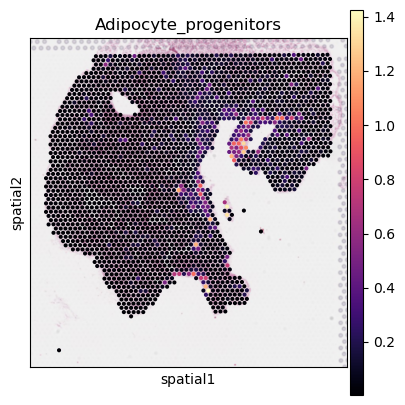

In [12]:
slide = select_slide(adata_vis, 'count-D1')
with plt.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):

    sc.pl.spatial(slide, cmap='magma',
                  # show first 8 cell types
                  color=list(slide.uns['mod']['factor_names'])[0], img_key='hires', size = 1.3)

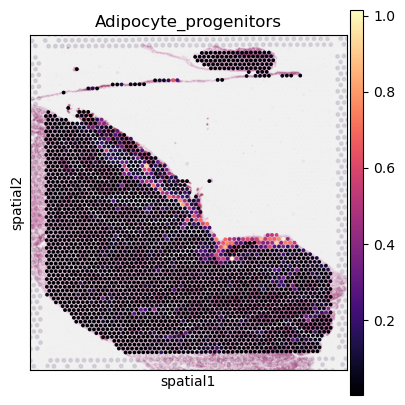

In [13]:
slide = select_slide(adata_vis, 'count-A1')
with plt.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):

    sc.pl.spatial(slide, cmap='magma',
                  # show first 8 cell types
                  color=list(slide.uns['mod']['factor_names'])[0], img_key='hires', size = 1.3)

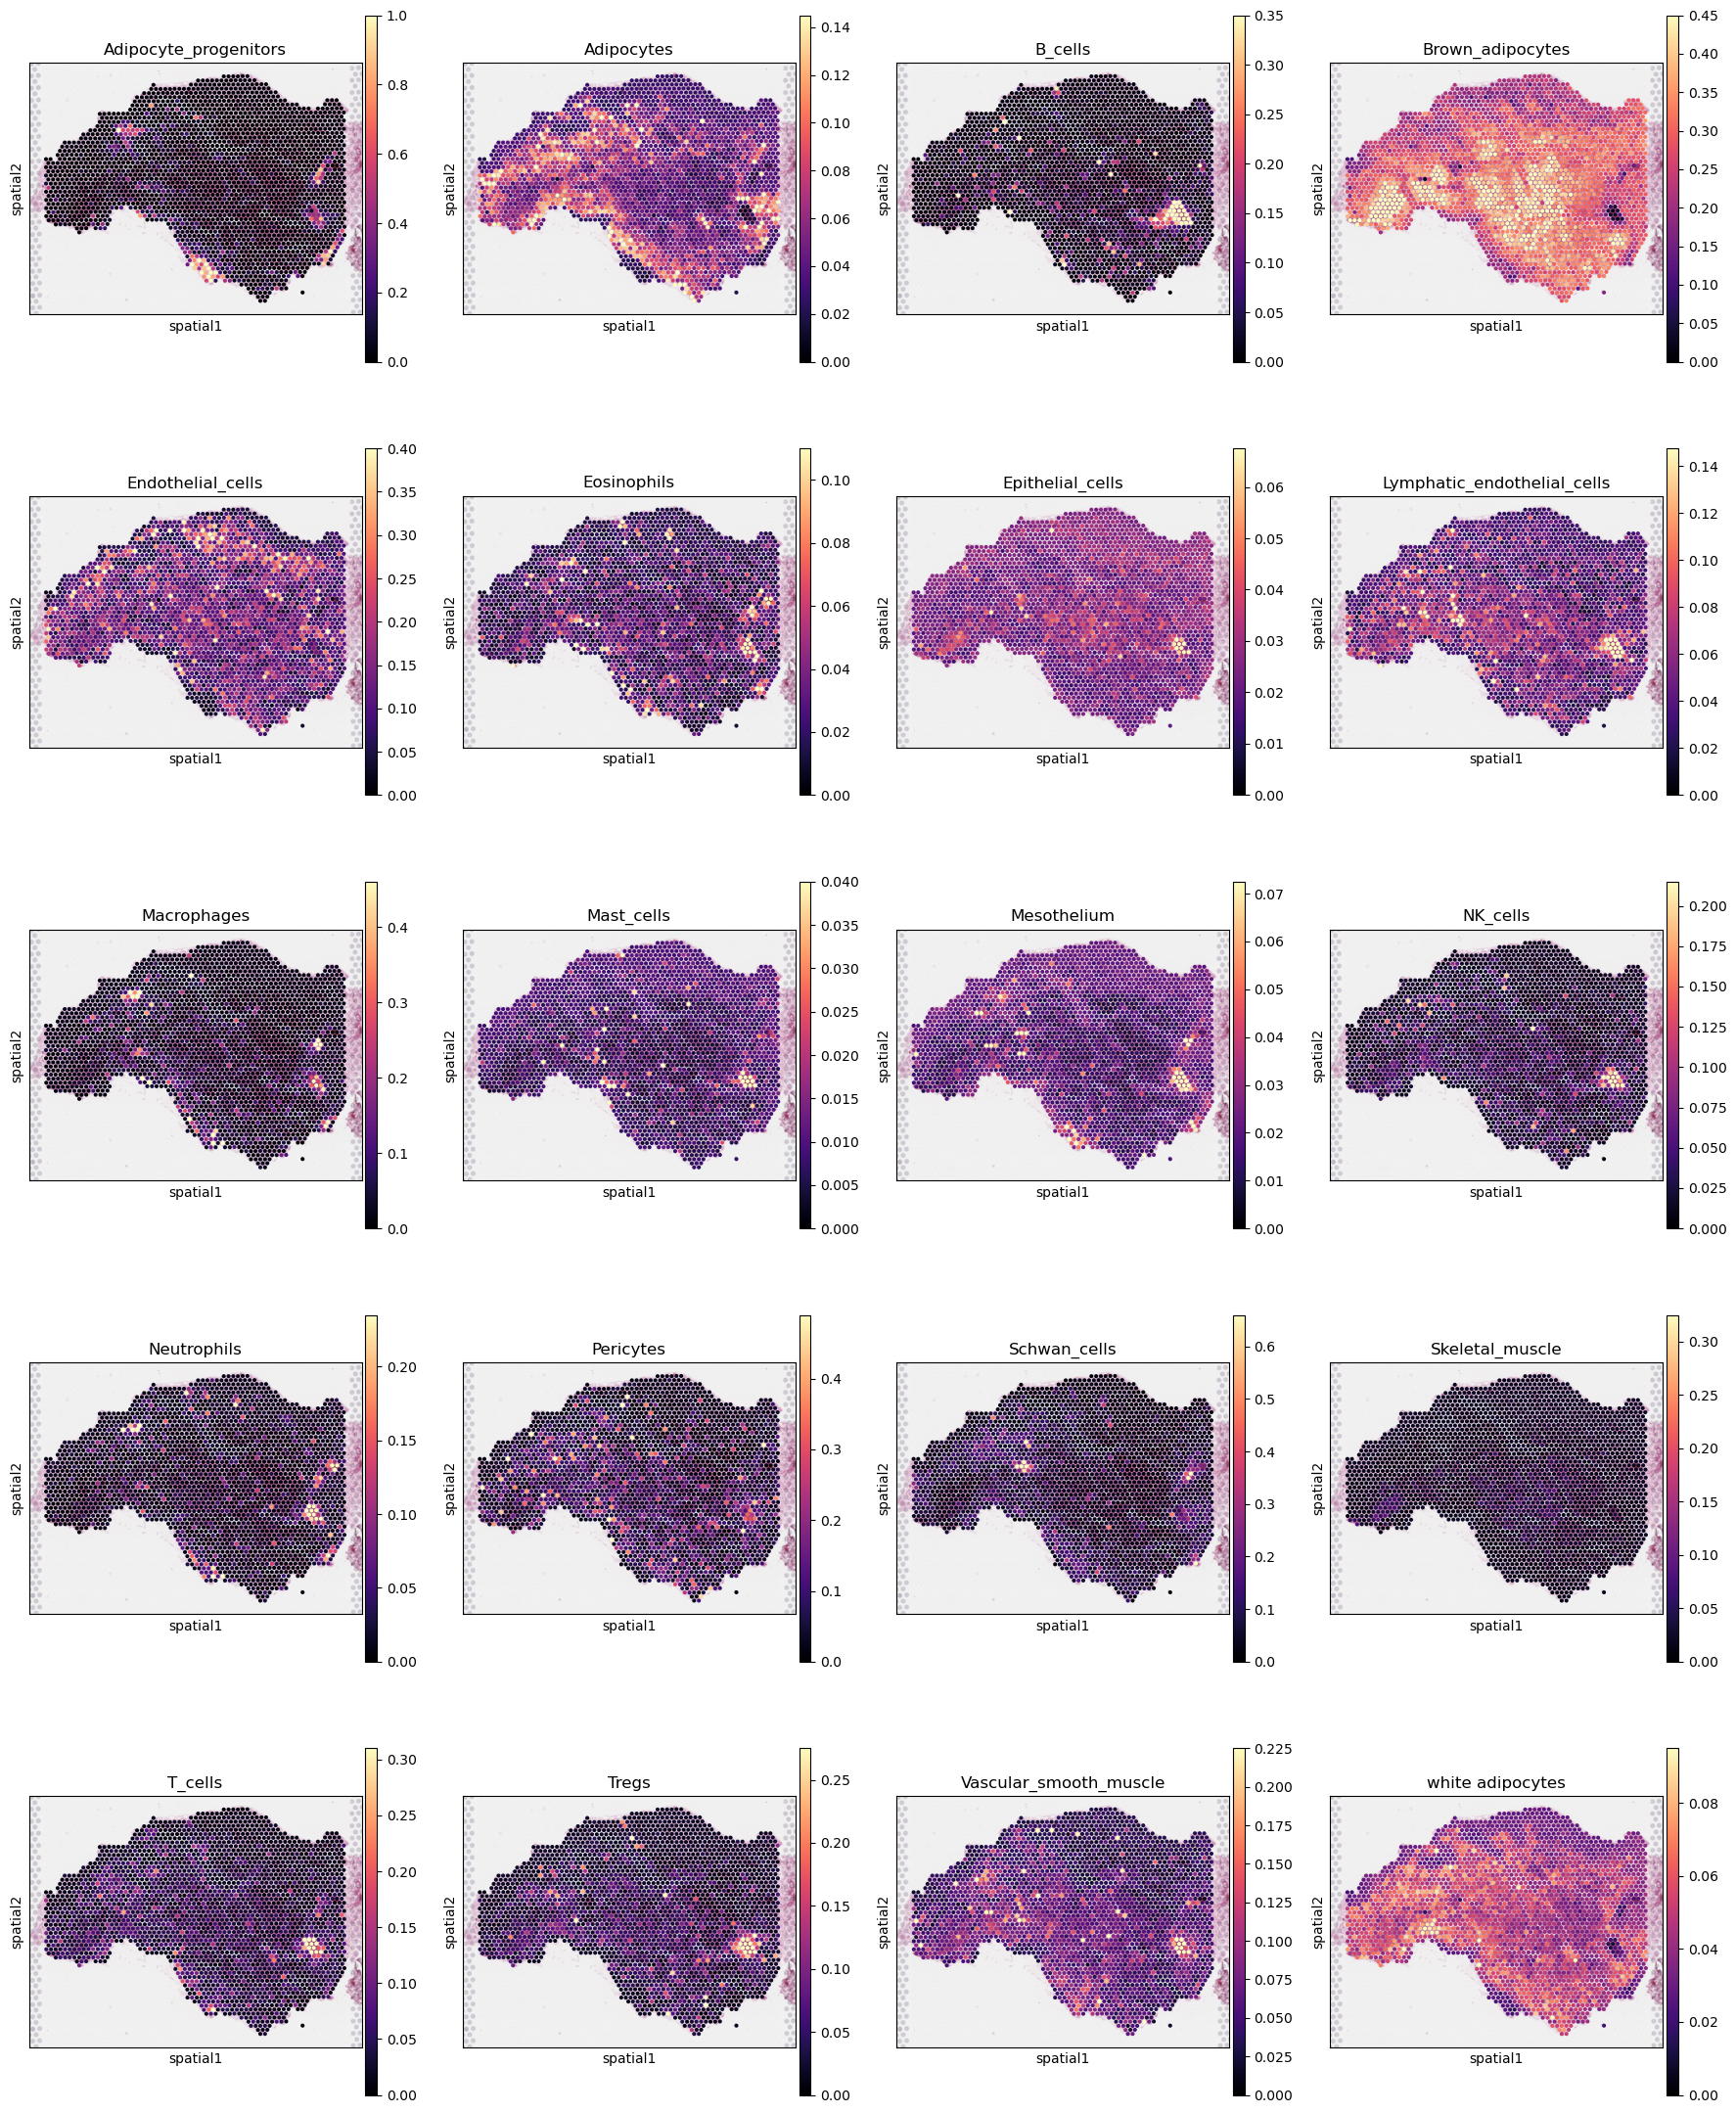

In [14]:
maxes2 = [1, 0.145, 0.35, 0.45,
         0.4, 0.11, 0.0675, 0.1475,
          0.46, 0.04, 0.0725, 0.215,
          0.235, 0.49, 0.66, 0.325,
          0.31, 0.275, 0.225, 0.095]

slide = select_slide(adata_vis, 'count-B1')
with plt.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):

    sc.pl.spatial(slide, cmap='magma',
                  # show first 8 cell types
                  color=list(slide.uns['mod']['factor_names']),
                  ncols=4, size=1.3,
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax=maxes2, library_id='count-B1', show = True
                 )

## why is library_id still needed after selecting the slide?

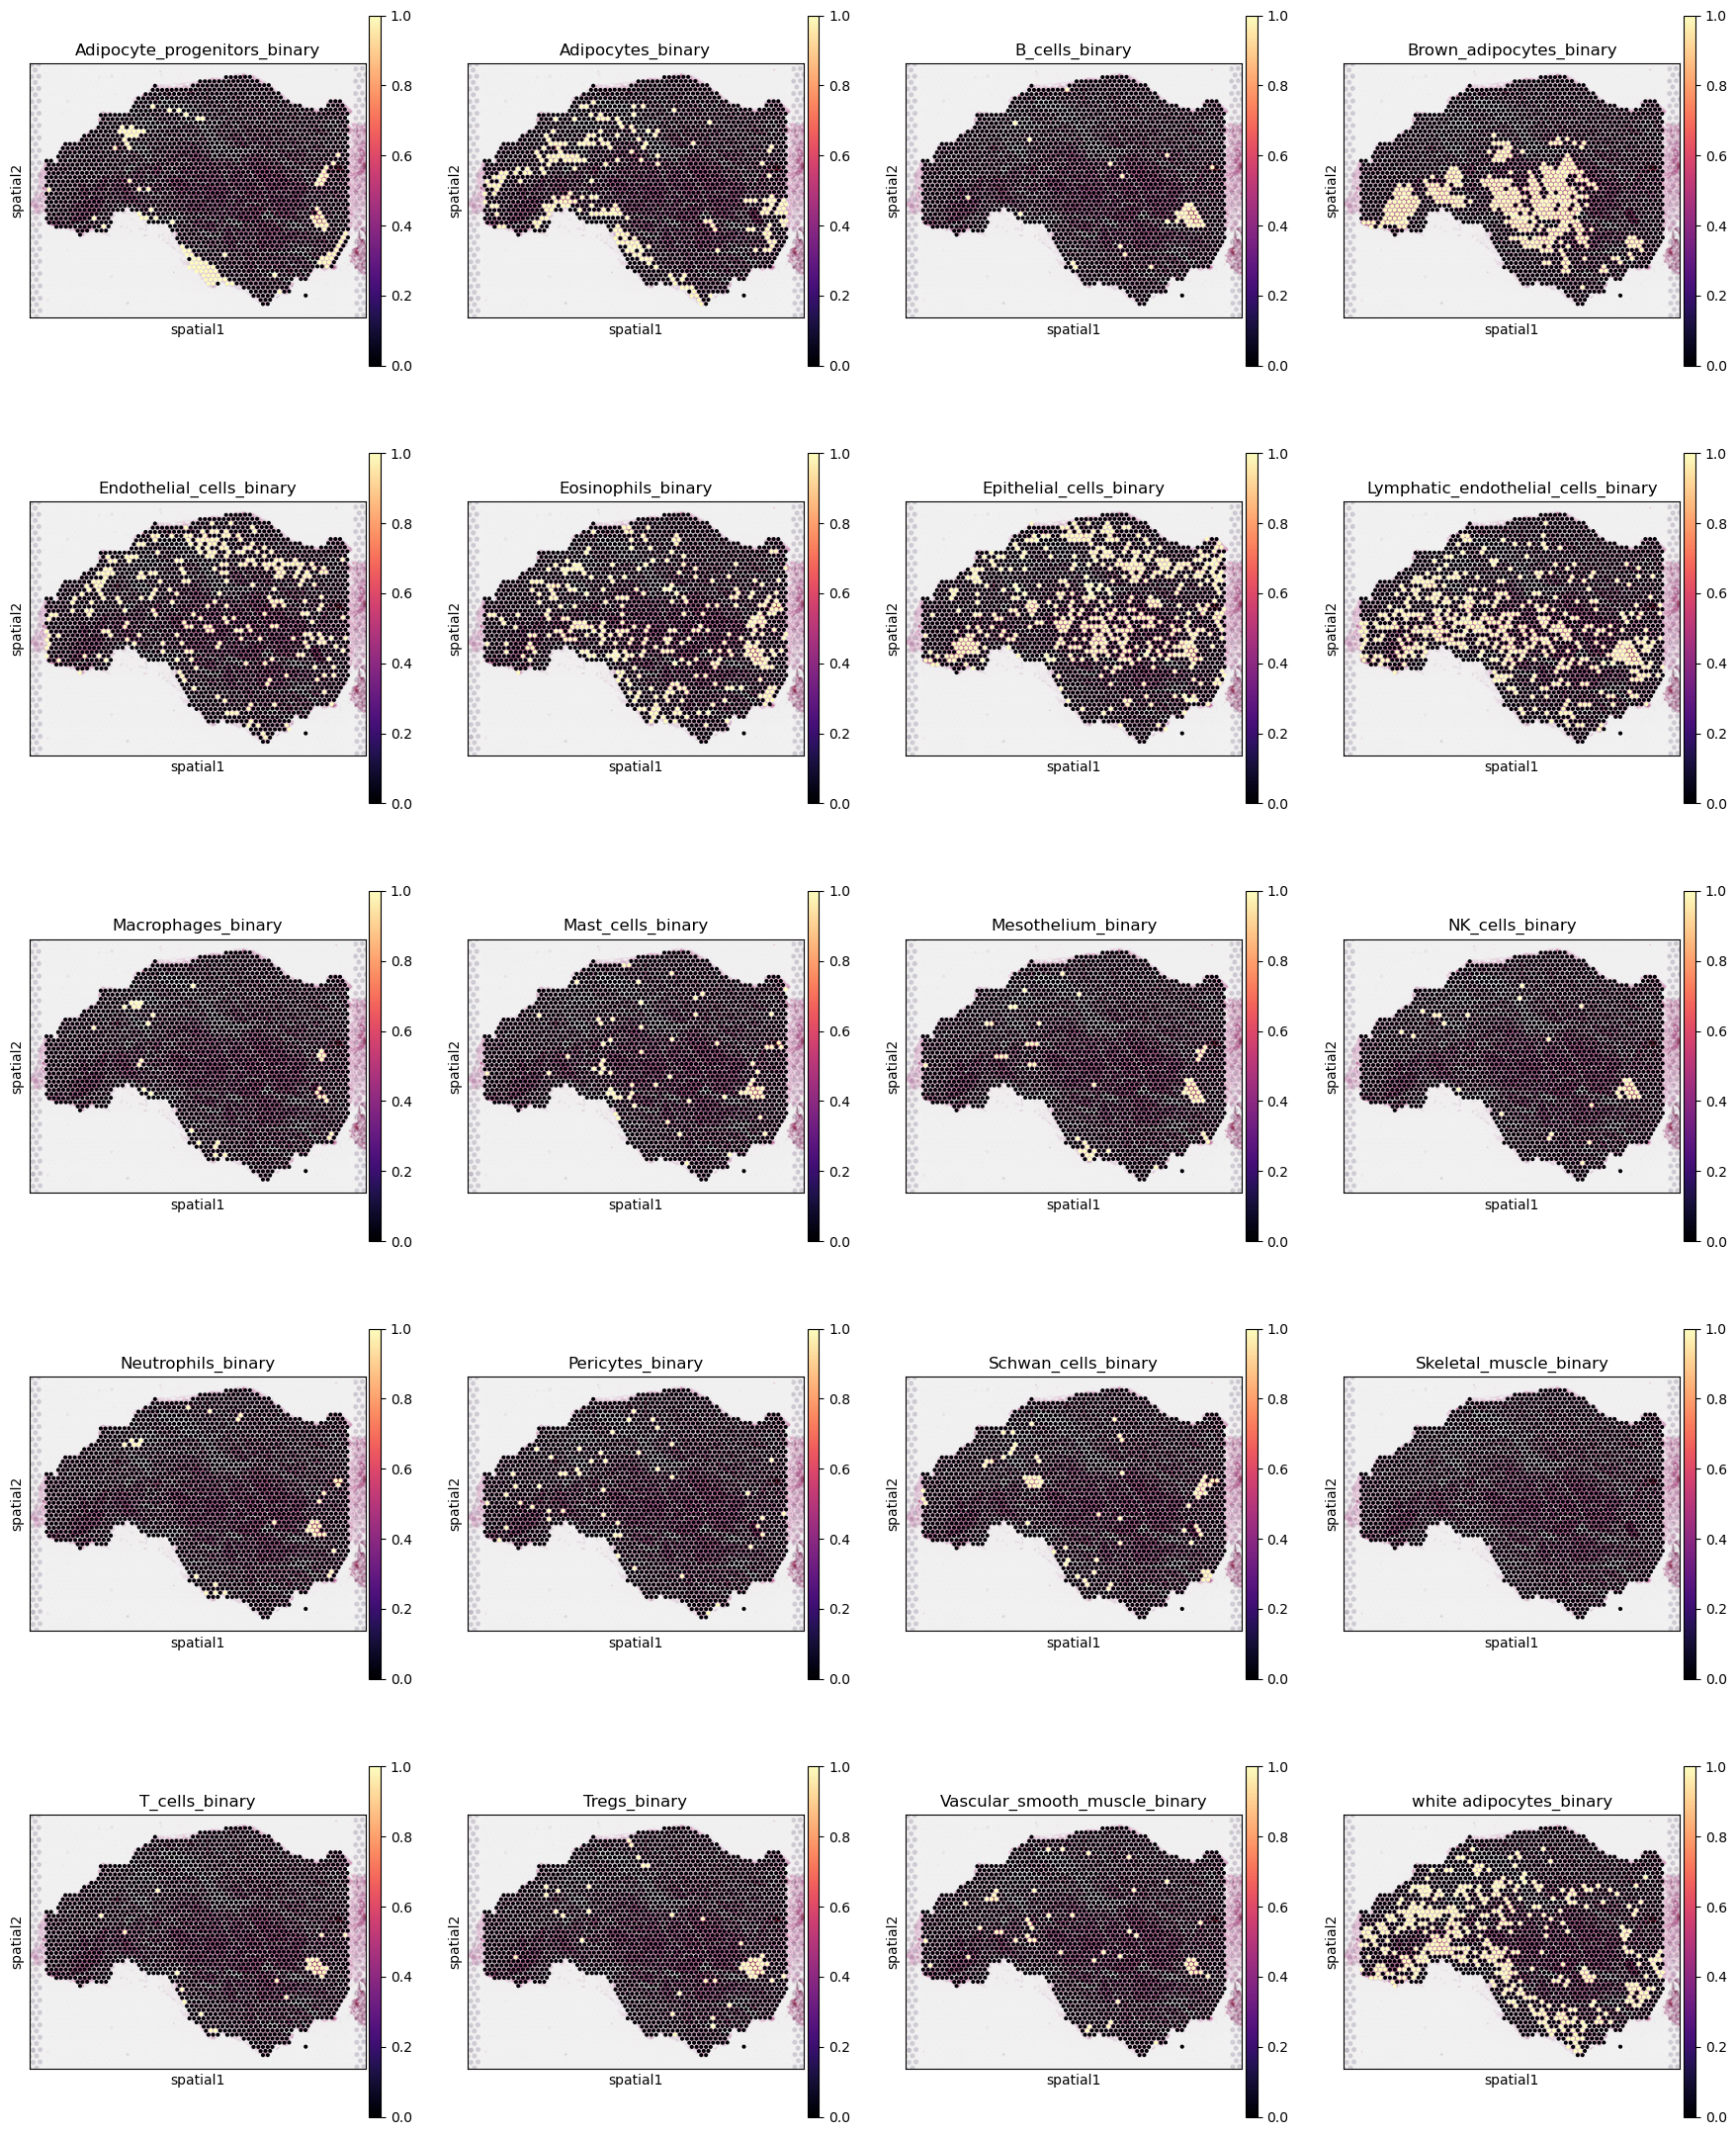

In [15]:
slide = select_slide(adata_vis, 'count-B1')
with plt.rc_context({'axes.facecolor':  'black',
                     'figure.figsize': [4.5, 5]}):

    sc.pl.spatial(slide, cmap='magma',
                  # show first 8 cell types
                  color=list(slide.uns['mod']['factor_names'] + '_binary'),
                  ncols=4, size=1.3,
                  img_key='hires',
                  # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax=1, library_id='count-B1', show = True
                 )

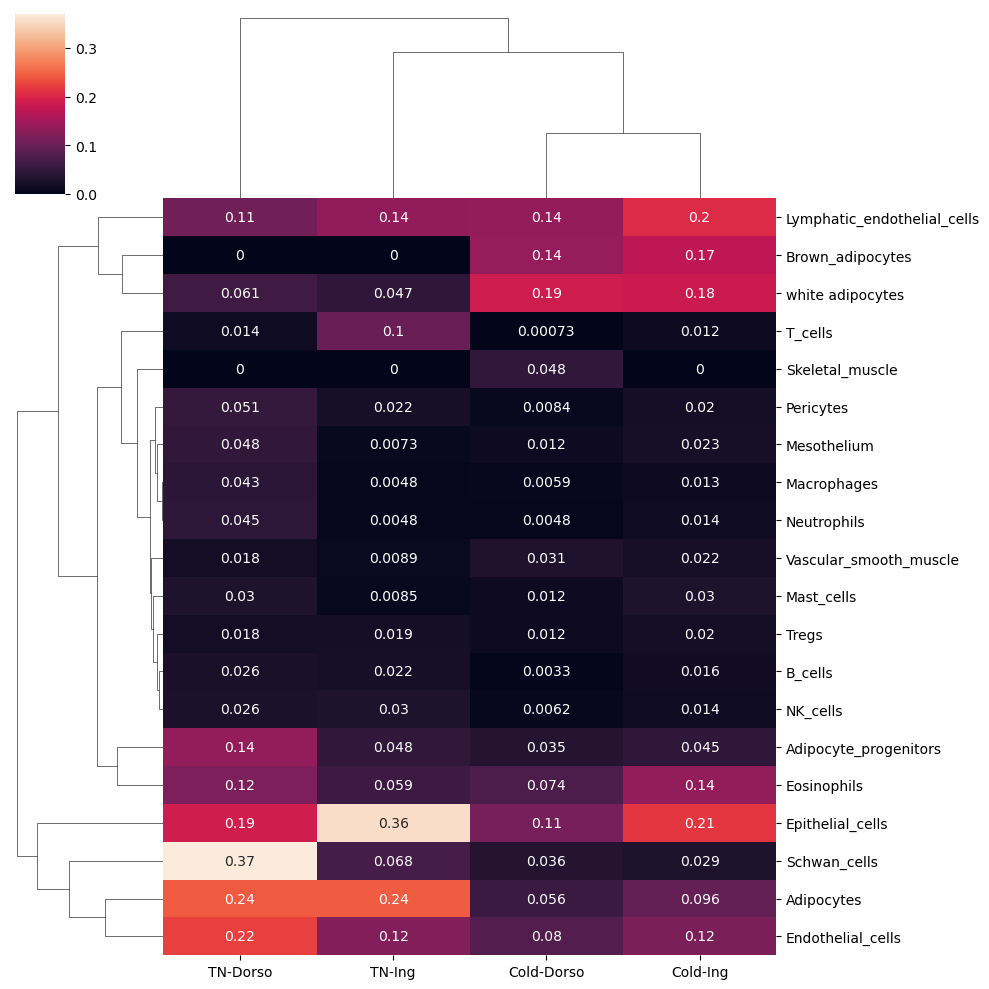

In [16]:
## make heatmap of deconvoluted_proportions_df
ax = sns.clustermap(deconvoluted_proportions_df, annot = True)

In [21]:
## cell type frequency across all slides
combined_counts = pd.concat(deconvoluted_counts.values())
combined_props = combined_counts.sum(axis = 0)/combined_counts.count(axis = 0)

In [38]:
df = pd.DataFrame(combined_props)
df.index = df.index.str.replace('q05cell_abundance_w_sf_','')

Text(0, 0.5, 'Proportion')

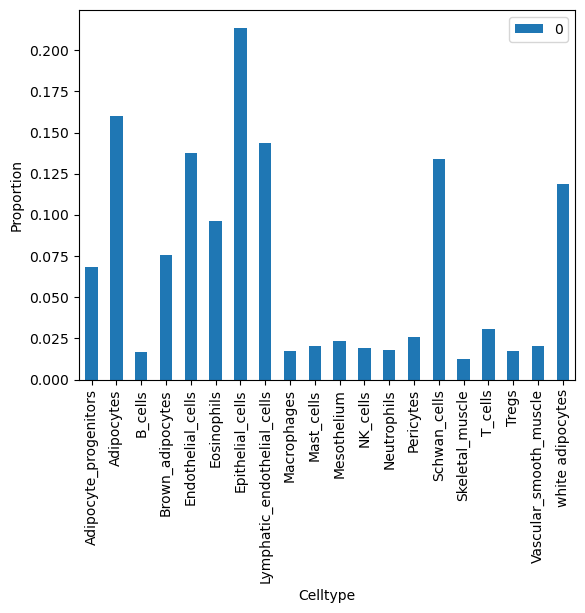

In [42]:
import matplotlib.pyplot as plt
 

# create stacked bar chart for monthly temperatures
df.plot(kind='bar', stacked=False)
 
# labels for x & y axis
plt.xlabel('Celltype')
plt.ylabel('Proportion')